In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('Z:/faily/train.csv')
test = pd.read_csv('Z:/faily/test.csv')
#датасет спрева скачиваю на диск, чтобы иметь возможноть работать не в сети и не иметь проблем с подключением

In [3]:
train.head(10)
#смотрим что есть

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [4]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [5]:
train.describe(include='O')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Anton Woody
freq,1,4602,5439,8,5915,8291,2


In [6]:
train.shape
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
transported = train[train["Transported"] == True]
non_transported = train[train["Transported"] == False]
print(f"Transported: {len(transported)} ({len(transported) / len(train) * 100.0:0.1f})%")
print(f"Non transported: {len(non_transported)} ({len(non_transported) / len(train) * 100.0:0.1f})%")
print(f"Total: {len(train)}")
#смотрим количество перемещенных и неперемещенных

Transported: 4378 (50.4)%
Non transported: 4315 (49.6)%
Total: 8693


<Axes: xlabel='HomePlanet', ylabel='Transported'>

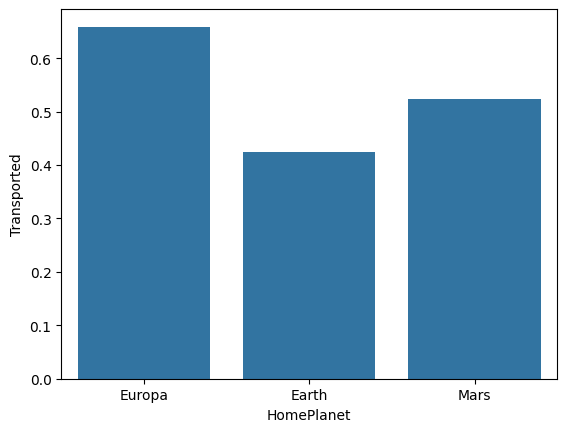

In [8]:
sns.barplot(x='HomePlanet', y='Transported', data=train, errorbar=None)
#Люди с земли имеют больше шансов на выживание

In [9]:
train.HomePlanet.value_counts()
#с земли больше всего пассажиров

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

In [10]:
train.Destination.value_counts()
#на рейс TRAPPIST-1e идет подавляющее большинство

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

<Axes: xlabel='Destination', ylabel='Transported'>

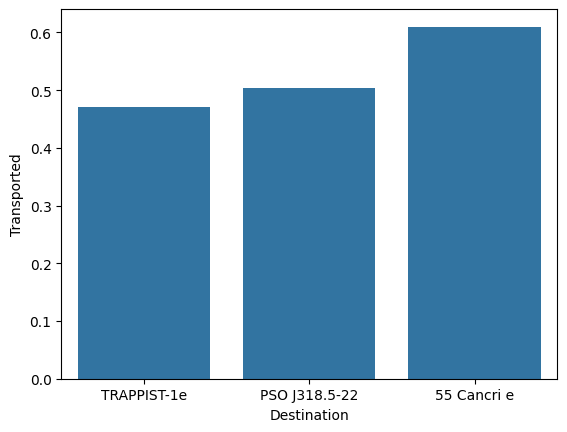

In [11]:
sns.barplot(x='Destination', y='Transported', data=train, errorbar=None)
#Учитывая что большинсто летело в траппист, остальные маршруты выглядят более опасно

In [12]:
train.isnull().sum()
#Очень много пустых ячеек данных, надо как-то заполнять(

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

<Axes: xlabel='Age', ylabel='Transported'>

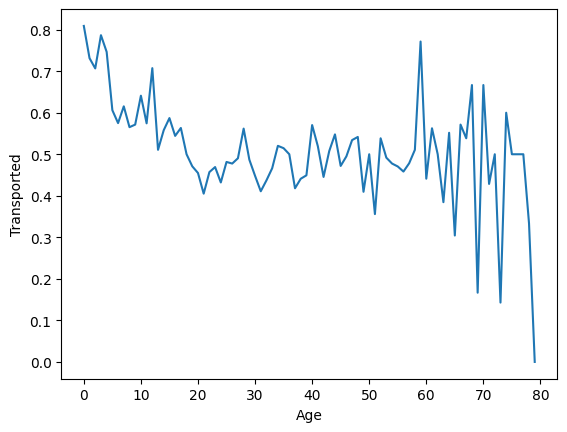

In [13]:
sns.lineplot(data=train, x="Age", y="Transported", errorbar=None)
#сложно что-то анализировать, молодые более часто перемещались, старшие имеют большой разброс

In [14]:
tab = pd.crosstab(train['CryoSleep'], train['VIP'])
print(tab)
#нет значительных зависимостей

VIP        False  True 
CryoSleep              
False       5143    175
True        2941     21


In [15]:
train.VIP.value_counts()
#Виайпишников почти и нет

VIP
False    8291
True      199
Name: count, dtype: int64

In [16]:
train.groupby('VIP').Transported.value_counts()

VIP    Transported
False  True           4198
       False          4093
True   False           123
       True             76
Name: count, dtype: int64

<Axes: xlabel='VIP', ylabel='Transported'>

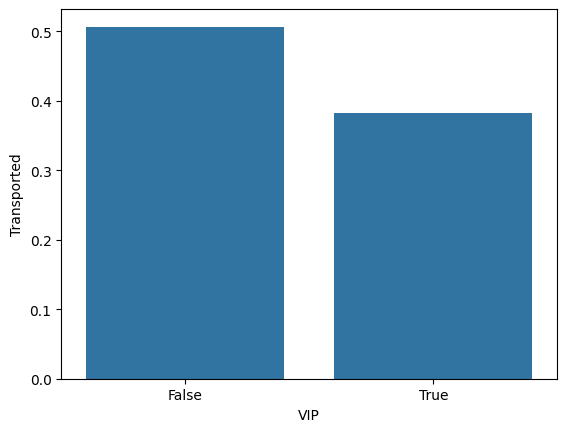

In [17]:
sns.barplot(x='VIP', y='Transported', data=train, errorbar=None)
#Виайпишники имеют чуть большие шансы

In [18]:
df_split = train['Cabin'].str.split('/', expand=True)
train['Deck'] = df_split[0]
train['Num'] = df_split[1]
train['Side'] = df_split[2]
test_split = test['Cabin'].str.split('/', expand=True)
test['Deck'] = test_split[0]
test['Num'] = test_split[1]
test['Side'] = test_split[2]
train.head(10)
#разделяем Cabin на Deck, Num и Side

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True,F,0,P
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True,F,2,S
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True,G,0,S
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True,F,3,S
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True,B,1,P


In [19]:
train['Sum'] = train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
test['Sum'] = test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
#создаем признак абсолютных затрат

<Axes: xlabel='Deck', ylabel='Transported'>

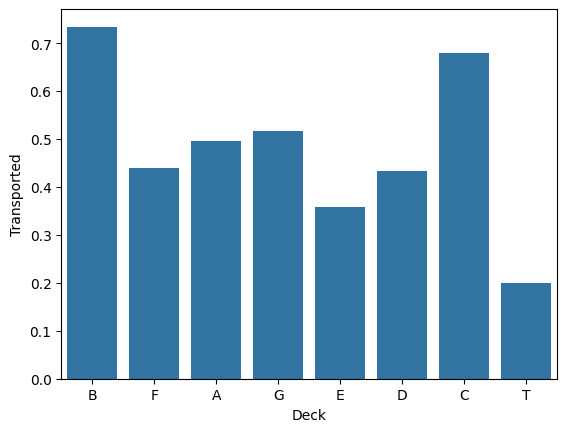

In [20]:
sns.barplot(x='Deck', y='Transported', data=train, errorbar=None)
#Видно что B и C самые неживучие, Т самые живучие, остальные средне, можно их так сгруппировать

In [21]:
train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,Sum
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,1091.0
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True,F,0,P,774.0
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True,F,2,S,1584.0
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True,G,0,S,0.0
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True,F,3,S,1018.0
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True,B,1,P,0.0


<Axes: xlabel='Deck', ylabel='Transported'>

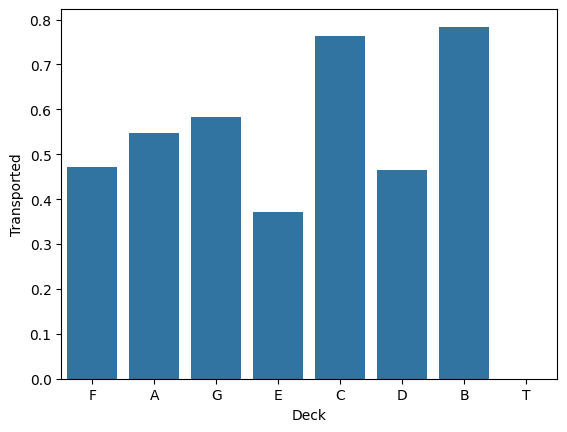

In [22]:
sns.barplot(x='Deck', y='Transported', data=train[train['Side'] == 'S'], errorbar=None)

<Axes: xlabel='Deck', ylabel='Transported'>

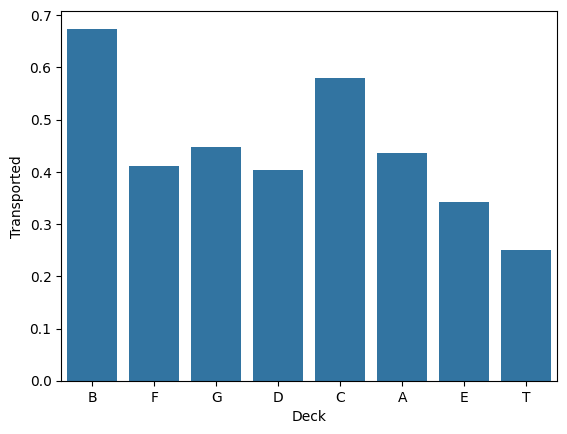

In [23]:
sns.barplot(x='Deck', y='Transported', data=train[train['Side'] == 'P'], errorbar=None)
#нет зависимости от стороны

In [24]:
train.Side.value_counts()

Side
S    4288
P    4206
Name: count, dtype: int64

<Axes: xlabel='Side', ylabel='Transported'>

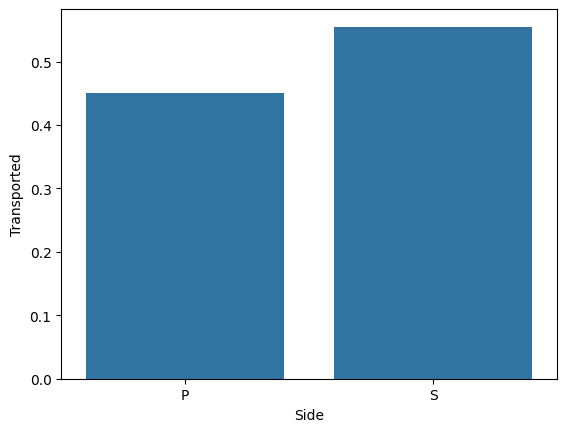

In [25]:
sns.barplot(x='Side', y='Transported', data=train, errorbar=None)
#незначительное различие

<Axes: xlabel='Num', ylabel='Transported'>

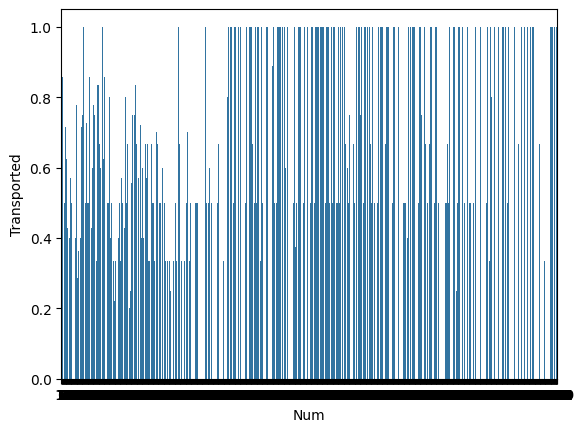

In [26]:
sns.barplot(data=train[train["Side"] == 'S'], x="Num", y="Transported", errorbar=None)

<Axes: xlabel='Num', ylabel='Transported'>

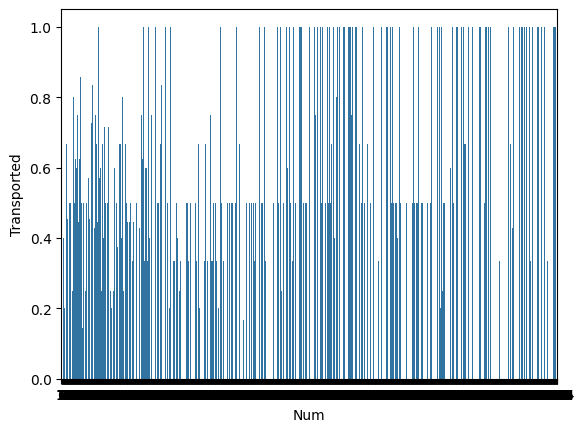

In [27]:
sns.barplot(data=train[train["Side"] == 'P'], x="Num", y="Transported", errorbar=None)
#какой-то явной зависимости не найти(пока не нашел лучшего способа для визуализации здесь)

<Axes: xlabel='Spa', ylabel='Transported'>

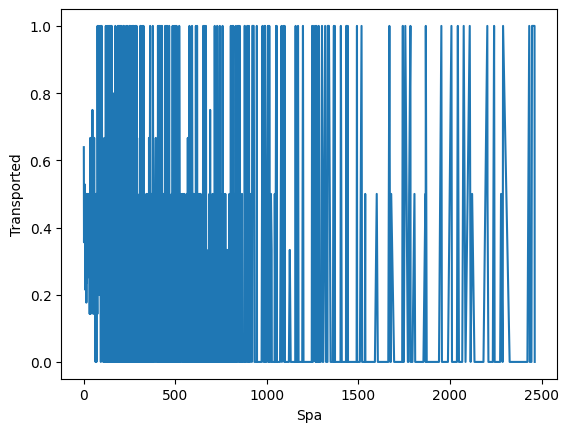

In [28]:
sns.lineplot(data=train[train["Spa"] < 2500], x="Spa", y="Transported", errorbar=None)
#с одной стороны видно что чем меньше тем плотнее, но при этом чем больше трат, тем меньше людей их совершают

<Axes: xlabel='VRDeck', ylabel='Transported'>

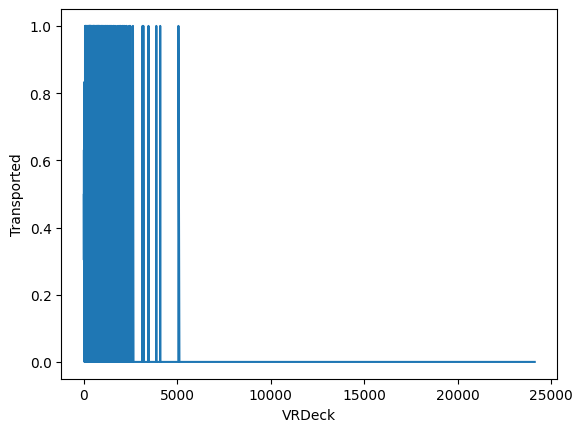

In [29]:
sns.lineplot(x='VRDeck', y='Transported', data=train, errorbar=None)
#аналогично

In [30]:
tab = pd.crosstab(train['Deck'], train['Side'])
print(tab)
#практически идентично

Side     P     S
Deck            
A      117   139
B      353   426
C      341   406
D      248   230
E      429   447
F     1438  1356
G     1276  1283
T        4     1


<Axes: xlabel='RoomService', ylabel='Transported'>

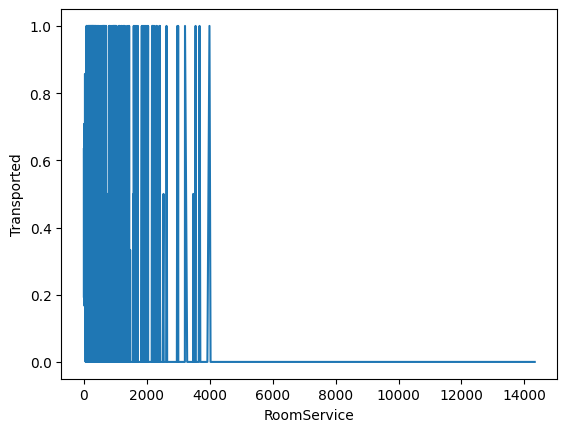

In [31]:
sns.lineplot(x='RoomService', y='Transported', data=train, errorbar=None)
#то же самое

<Axes: xlabel='FoodCourt', ylabel='Transported'>

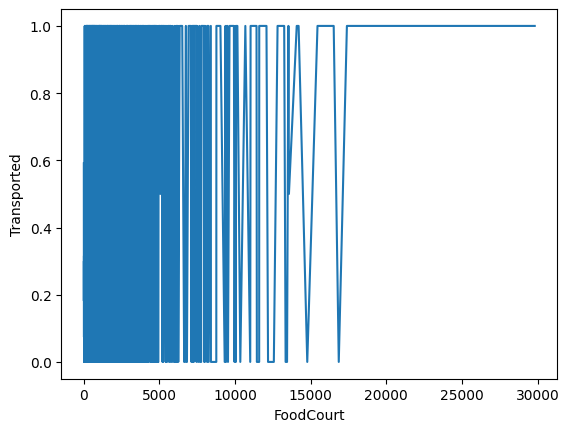

In [32]:
sns.lineplot(x='FoodCourt', y='Transported', data=train, errorbar=None)
#а тут явно видно, что люди с большими тратами почти всегда перемещались

<Axes: xlabel='Sum', ylabel='Transported'>

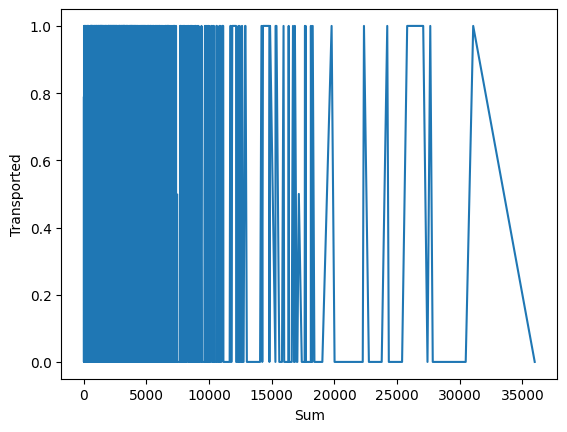

In [33]:
sns.lineplot(x='Sum', y='Transported', data=train, errorbar=None)
#здесь люди с самыми большими тратами транспортировались меньше(осознаю свое несовершенство визуализации, лучше пока не могу)

In [34]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Deck,Num,Side,Sum
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S,0.0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S,2832.0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S,0.0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S,7418.0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S,645.0


In [35]:
title = ('CryoSleep', 'VIP')
train_test_data = [train, test]
for t in title:
    for dataset in train_test_data:
        dataset[t] = dataset[t].map({True: 1, False: 0})
train['Transported'] = train['Transported'].map({True: 1, False: 0})
train.head()
#меняем true/false на 0/1

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,Sum
0,0001_01,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,B,0,P,0.0
1,0002_01,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,F,0,S,736.0
2,0003_01,Europa,0.0,A/0/S,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,A,0,S,10383.0
3,0003_02,Europa,0.0,A/0/S,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,A,0,S,5176.0
4,0004_01,Earth,0.0,F/1/S,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,F,1,S,1091.0


In [36]:
train.HomePlanet.value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

In [37]:
for dataset in train_test_data:
    dataset['HomePlanet'] = dataset['HomePlanet'].map( {'Earth': 1, 'Europa': 3, 'Mars': 2} )
train.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,Sum
0,0001_01,3.0,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,B,0,P,0.0
1,0002_01,1.0,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,F,0,S,736.0
2,0003_01,3.0,0.0,A/0/S,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,A,0,S,10383.0
3,0003_02,3.0,0.0,A/0/S,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,A,0,S,5176.0
4,0004_01,1.0,0.0,F/1/S,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,F,1,S,1091.0


In [38]:
for dataset in train_test_data:
    dataset['Destination'] = dataset['Destination'].map( {'TRAPPIST-1e': 1, 'PSO J318.5-22': 2, '55 Cancri e': 3} )
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,Sum
0,0001_01,3.0,0.0,B/0/P,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,B,0,P,0.0
1,0002_01,1.0,0.0,F/0/S,1.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,F,0,S,736.0
2,0003_01,3.0,0.0,A/0/S,1.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,A,0,S,10383.0
3,0003_02,3.0,0.0,A/0/S,1.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,A,0,S,5176.0
4,0004_01,1.0,0.0,F/1/S,1.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,F,1,S,1091.0


In [39]:
deck_mapping = {'A': 2, 'B': 3, 'C': 3, 'D': 2, 'E': 2, 'F': 2, 'G': 2, 'T': 1}
for dataset in train_test_data:
    dataset['Deck'] = dataset['Deck'].map(deck_mapping)
    dataset['Side'] = dataset['Side'].map({'P': 1, 'S': 0})
train.head()
#меняем категориальные признаки на циферки

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,Sum
0,0001_01,3.0,0.0,B/0/P,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,3.0,0,1.0,0.0
1,0002_01,1.0,0.0,F/0/S,1.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,2.0,0,0.0,736.0
2,0003_01,3.0,0.0,A/0/S,1.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,2.0,0,0.0,10383.0
3,0003_02,3.0,0.0,A/0/S,1.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,2.0,0,0.0,5176.0
4,0004_01,1.0,0.0,F/1/S,1.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,2.0,1,0.0,1091.0


<Axes: xlabel='Num', ylabel='Transported'>

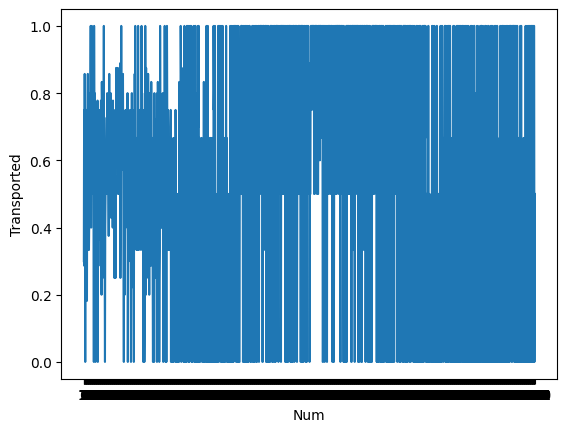

In [40]:
sns.lineplot(x='Num', y='Transported', data=train[train['Side'] == 0], errorbar=None)
#тяжело искать зависимости

In [41]:
train['Num'] = pd.to_numeric(train['Num'], errors='coerce')

In [42]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,Sum
0,0001_01,3.0,0.0,B/0/P,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,3.0,0.0,1.0,0.0
1,0002_01,1.0,0.0,F/0/S,1.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,2.0,0.0,0.0,736.0
2,0003_01,3.0,0.0,A/0/S,1.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,2.0,0.0,0.0,10383.0
3,0003_02,3.0,0.0,A/0/S,1.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,2.0,0.0,0.0,5176.0
4,0004_01,1.0,0.0,F/1/S,1.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,2.0,1.0,0.0,1091.0


In [43]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Deck            199
Num             199
Side            199
Sum               0
dtype: int64

In [44]:
for dataset in train_test_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
#импутация возраста статистическими методами

C:\Users\Maxim Zubarev\AppData\Local\Temp\ipykernel_3036\559691984.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
C:\Users\Maxim Zubarev\AppData\Local\Temp\ipykernel_3036\5

In [45]:
string_titles = ['Cabin', 'Name']
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=5)
train1 = pd.DataFrame(imputer.fit_transform(train.drop(string_titles, axis=1)), 
                         columns=train.drop(string_titles, axis=1).columns)
test1 = pd.DataFrame(imputer.fit_transform(test.drop(string_titles, axis=1)), 
                         columns=test.drop(string_titles, axis=1).columns)
train1.isnull().sum()
Titles = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'Deck', 'Num', 'Side']
train1[Titles] = train1[Titles].astype(int)
test1[Titles] = test1[Titles].astype(int)
#я попробовал импутацию с помощью алгоритма knn, точность вычисления при этом незначительно выросла

In [46]:
train1.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,Sum
0,101.0,3,0,1,39,0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,1,0.0
1,201.0,1,0,1,24,0,109.0,9.0,25.0,549.0,44.0,1.0,2,0,0,736.0
2,301.0,3,0,1,58,1,43.0,3576.0,0.0,6715.0,49.0,0.0,2,0,0,10383.0
3,302.0,3,0,1,33,0,0.0,1283.0,371.0,3329.0,193.0,0.0,2,0,0,5176.0
4,401.0,1,0,1,16,0,303.0,70.0,151.0,565.0,2.0,1.0,2,1,0,1091.0


In [47]:
train_test_data = [train1, test1]
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
#группировка возраста

In [48]:
PriceTitles = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
'''for title in PriceTitles:
    for dataset in train_test_data:
        dataset.loc[ dataset[title] <= 500, title] = 0
        dataset.loc[ (dataset[title] > 500) & (dataset[title] <= 1000), title] = 1
        dataset.loc[ (dataset[title] > 1000) & (dataset[title] <= 2000), title] = 2
        dataset.loc[ (dataset[title] > 2000) & (dataset[title] <= 5000), title] = 3
        dataset.loc[ (dataset[title] > 5000) & (dataset[title] <= 10000), title] = 4
        dataset.loc[ (dataset[title] > 10000) & (dataset[title] <= 15000), title] = 5
        dataset.loc[ dataset[title] > 15000, title] = 6

for dataset in train_test_data:
    dataset.loc[ dataset['Sum'] <= 7200, 'Sum'] = 0
    dataset.loc[(dataset['Sum'] > 7200) & (dataset['Sum'] <= 14400), 'Sum'] = 1
    dataset.loc[(dataset['Sum'] > 14400) & (dataset['Sum'] <= 21600), 'Sum'] = 2
    dataset.loc[(dataset['Sum'] > 21600) & (dataset['Sum'] <= 28800), 'Sum'] = 3
    dataset.loc[ dataset['Sum'] > 28800, 'Sum'] = 4'''
#группировка ценовых признаков любыми методами приводит к ухудшению точности предсказания, поэтому я оставил последнюю попытку в кавычках 

"for title in PriceTitles:\n    for dataset in train_test_data:\n        dataset.loc[ dataset[title] <= 500, title] = 0\n        dataset.loc[ (dataset[title] > 500) & (dataset[title] <= 1000), title] = 1\n        dataset.loc[ (dataset[title] > 1000) & (dataset[title] <= 2000), title] = 2\n        dataset.loc[ (dataset[title] > 2000) & (dataset[title] <= 5000), title] = 3\n        dataset.loc[ (dataset[title] > 5000) & (dataset[title] <= 10000), title] = 4\n        dataset.loc[ (dataset[title] > 10000) & (dataset[title] <= 15000), title] = 5\n        dataset.loc[ dataset[title] > 15000, title] = 6\n\nfor dataset in train_test_data:\n    dataset.loc[ dataset['Sum'] <= 7200, 'Sum'] = 0\n    dataset.loc[(dataset['Sum'] > 7200) & (dataset['Sum'] <= 14400), 'Sum'] = 1\n    dataset.loc[(dataset['Sum'] > 14400) & (dataset['Sum'] <= 21600), 'Sum'] = 2\n    dataset.loc[(dataset['Sum'] > 21600) & (dataset['Sum'] <= 28800), 'Sum'] = 3\n    dataset.loc[ dataset['Sum'] > 28800, 'Sum'] = 4"

In [49]:
train1.head()
#проверка

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,Sum
0,101.0,3,0,1,2,0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,1,0.0
1,201.0,1,0,1,1,0,109.0,9.0,25.0,549.0,44.0,1.0,2,0,0,736.0
2,301.0,3,0,1,3,1,43.0,3576.0,0.0,6715.0,49.0,0.0,2,0,0,10383.0
3,302.0,3,0,1,2,0,0.0,1283.0,371.0,3329.0,193.0,0.0,2,0,0,5176.0
4,401.0,1,0,1,0,0,303.0,70.0,151.0,565.0,2.0,1.0,2,1,0,1091.0


In [50]:
train1 = train1.drop(["PassengerId"], axis=1)
train1.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
Num             0
Side            0
Sum             0
dtype: int64

<Axes: >

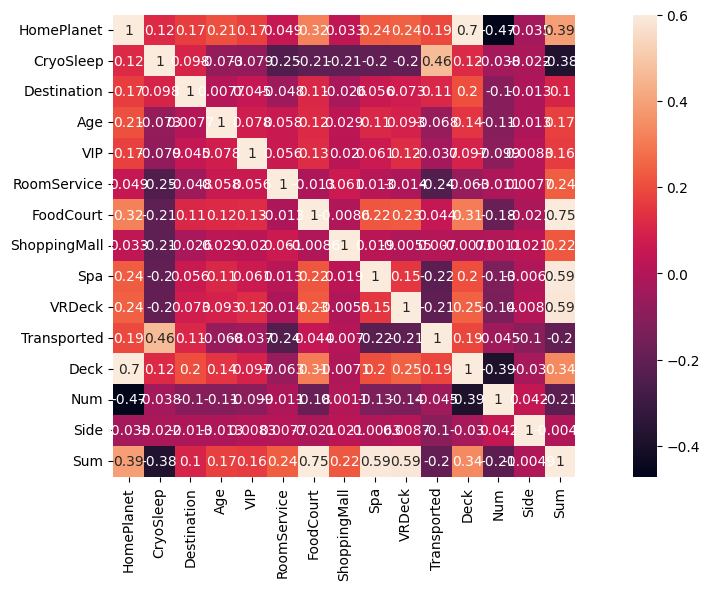

In [51]:
plt.figure(figsize=(15,6))
sns.heatmap(train1.corr(), vmax=0.6, square=True, annot=True)
#матрица корреляций

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
#приступаем к обучению

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MaxAbsScaler
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
def lr_pipeline():
    model = make_pipeline(StandardScaler(), LogisticRegression(random_state = 0))
    return model

def rf_pipeline():
    model = make_pipeline(StandardScaler(), RandomForestClassifier(random_state = 0))
    return model

def catboost_pipeline():
    model = make_pipeline(StandardScaler(), CatBoostClassifier(random_state = 0))
    return model

In [63]:
def feature_importances(df):
        
    X = df.drop('Transported', axis=1)
    y = df[['Transported']]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
    
    # Logistic Regression    
    #clf_lr = LogisticRegression(random_state = 0)
    clf_lr = lr_pipeline()
    clf_lr.fit(X_train, y_train)
    #coef_lr = clf_lr.coef_[0]
    coef_lr = clf_lr[1].coef_[0]
    
    acc_train_lr = accuracy_score(y_true=y_train, y_pred=clf_lr.predict(X_train))
    acc_test_lr = accuracy_score(y_true=y_test, y_pred=clf_lr.predict(X_test))
    label_lr = f'Importance (LR abs), acc_train = {acc_train_lr:.2%}, acc_test = {acc_test_lr:.2%}'
    
    # Random Forest
    # clf_rf = RandomForestClassifier(random_state = 0)
    clf_rf = rf_pipeline()
    clf_rf.fit(X_train, y_train)
    #coef_rf = clf_rf.feature_importances_
    coef_rf = clf_rf[1].feature_importances_
    
    acc_train_rf = accuracy_score(y_true=y_train, y_pred=clf_rf.predict(X_train))
    acc_test_rf = accuracy_score(y_true=y_test, y_pred=clf_rf.predict(X_test))
    label_rf = f'Importance (LR abs), acc_train = {acc_train_rf:.2%}, acc_test = {acc_test_rf:.2%}'
    
    # CatBoost
    # clf_cat = CatBoostClassifier(random_state = 0)
    clf_cat = catboost_pipeline()
    clf_cat.fit(X_train, y_train, catboostclassifier__silent = True)
    #coef_cat = clf_cat.feature_importances_
    coef_cat = clf_cat[1].feature_importances_
    
    acc_train_cat = accuracy_score(y_true=y_train, y_pred=clf_cat.predict(X_train).astype('bool'))
    acc_test_cat = accuracy_score(y_true=y_test, y_pred=clf_cat.predict(X_test).astype('bool'))
    label_cat = f'Importance (LR abs), acc_train = {acc_train_cat:.2%}, acc_test = {acc_test_cat:.2%}'

    
    feauture_importances = pd.DataFrame({
        'Feature': X.columns,
        'LR': np.abs(coef_lr),
        'RF': coef_rf,
        'CatBoost': coef_cat
    })
    
    feauture_importances = feauture_importances.sort_values(by = 'CatBoost', ascending=False)
    
    sc = MaxAbsScaler()
    feauture_importances[['LR']] = sc.fit_transform(feauture_importances[['LR']])
    feauture_importances[['RF']] = sc.fit_transform(feauture_importances[['RF']])
    feauture_importances[['CatBoost']] = sc.fit_transform(feauture_importances[['CatBoost']])
    
    # Plot everything
    
    feauture_importances.plot(kind='barh', x='Feature')
    
#     ax = plt.bar(x=feauture_importances['Feature'], height=feauture_importances['Importance (LR abs)'], label = label_lr)
#     plt.bar(x=feauture_importances['Feature'], height=feauture_importances['Importance (RF)'], label = label_rf, axes=ax)
#     plt.bar(x=feauture_importances['Feature'], height=feauture_importances['Importance (Cat)'], label = label_cat, axes=ax)
#     plt.show()



    return ([acc_train_lr, acc_train_rf, acc_train_cat], [acc_test_lr, acc_test_rf, acc_test_cat])

C:\Users\Maxim Zubarev\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Maxim Zubarev\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


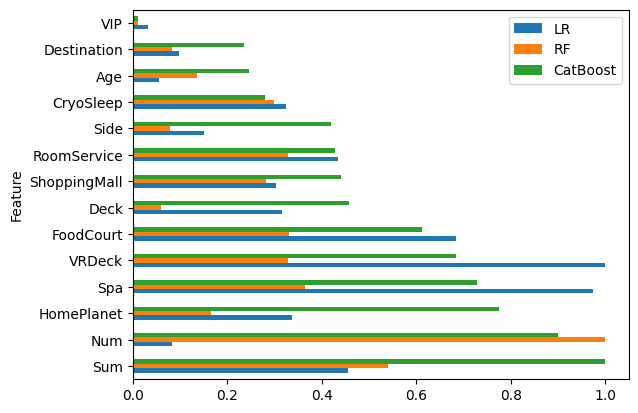

In [64]:
acc_train, acc_test = feature_importances(train1)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(train1.drop('Transported', axis=1), train1['Transported'], test_size=0.2)
#делим данные на тренировочные и тестовые

In [66]:
lr = LogisticRegression(max_iter=100)
lr.fit(X_train, y_train)
y_pred_log_reg = lr.predict(X_test)
acc_log_reg = round( lr.score(X_test, y_test) * 100, 2)
print (str(acc_log_reg) + ' percent')
#создаем модель, обучаем, проверяем на точность и так каждый раз

78.32 percent


C:\Users\Maxim Zubarev\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
acc_svc = round(svc.score(X_test, y_test) * 100, 2)
print (acc_svc)

78.72


In [68]:
lsvc = LinearSVC()
lsvc.fit(X_train, y_train)
y_pred_linear_svc = lsvc.predict(X_test)
acc_linear_svc = round(lsvc.score(X_test, y_test) * 100, 2)
print (acc_linear_svc)

77.69


In [69]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = round(knn.score(X_test, y_test) * 100, 2)
print (acc_knn)

77.11


In [70]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_decision_tree = dtc.predict(X_test)
acc_decision_tree = round(dtc.score(X_test, y_test) * 100, 2)
print (acc_decision_tree)

72.23


In [71]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_random_forest = rfc.predict(X_test)
acc_random_forest = round(rfc.score(X_test, y_test) * 100, 2)
print (acc_random_forest)

77.92


In [72]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
acc_gnb = round(gnb.score(X_test, y_test) * 100, 2)
print (acc_gnb)

70.73


In [73]:
pnn = Perceptron(max_iter=5, tol=None)
pnn.fit(X_train, y_train)
y_pred_perceptron = pnn.predict(X_test)
acc_perceptron = round(pnn.score(X_test, y_test) * 100, 2)
print (acc_perceptron)

73.32


In [74]:
sgd = SGDClassifier(max_iter=10, tol=None)
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_test, y_test) * 100, 2)
print (acc_sgd)

78.72


In [75]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
acc_xgb = round(xgb.score(X_test, y_test) * 100, 2)
print (acc_xgb)

79.47


In [76]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Linear SVC', 
              'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 
              'Perceptron', 'Stochastic Gradient Decent', 'XGBoost'],
    
    'Score': [acc_log_reg, acc_svc, acc_linear_svc, 
              acc_knn,  acc_decision_tree, acc_random_forest, acc_gnb, 
              acc_perceptron, acc_sgd, acc_xgb]
    })

models.sort_values(by='Score', ascending=False)
#сравниваем все модели

,Model,Score
9,XGBoost,79.47
1,Support Vector Machines,78.72
8,Stochastic Gradient Decent,78.72
0,Logistic Regression,78.32
5,Random Forest,77.92
2,Linear SVC,77.69
3,KNN,77.11
7,Perceptron,73.32
4,Decision Tree,72.23
6,Naive Bayes,70.73


In [77]:
final_mapping = {1: True, 0: False}
xgb.fit(train1.drop('Transported', axis=1), train1['Transported'])
y_pred = xgb.predict(test1.drop("PassengerId", axis=1).copy())
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Transported": y_pred
    })
submission['Transported'] = submission['Transported'].map(final_mapping)
#выбираем наиболее точную модель

In [ ]:
submission.head()
#проверка формата ответа

In [ ]:
submission.to_csv('Z:/faily/submission.csv', index=False)
#сохраняю в собственной директории во избежании ошибок